# Arms Races With a Guns-Butter Tradeoff

### Daniel Kent
### kent.249@osu.edu

+ Libraries and the model

In [1]:
from gb_mod import EconMod

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns ## use seaborn for all plots instead of matplotlib
sns.set()
sns.set_style("whitegrid")

import random
import numpy as np

import pandas as pd

## Example Run

+ Starting parameters

In [2]:
height = 14
width = 14
density = 1
domestic_min = 0.04 # Min of gdp to extract for governance
domestic_max = 0.32 # Max of gdp to extract for governance
domestic_mean = 0.16 # Mean of gdp to extract for governance
domestic_sd = 0.05 # SD of gdp to extract for governance
expenditures = 0.4 # Vary for final analysis -- percent of extracted rents that must go to public programs
num_adversaries = 4 # Vary for final analysis -- top n neighbors power-wise to consider for balancing
random.seed(54321)

+ Create the model

In [3]:
model = EconMod(height, width, density, 
                domestic_min, domestic_max, 
                domestic_mean, domestic_sd,
                num_adversaries, expenditures)

### Starting Conditions

#### Economy

+ Meant to represent GDP -- drawn from a pareto distribution

In [4]:
agent_econ = [a.econ for a in model.schedule.agents]

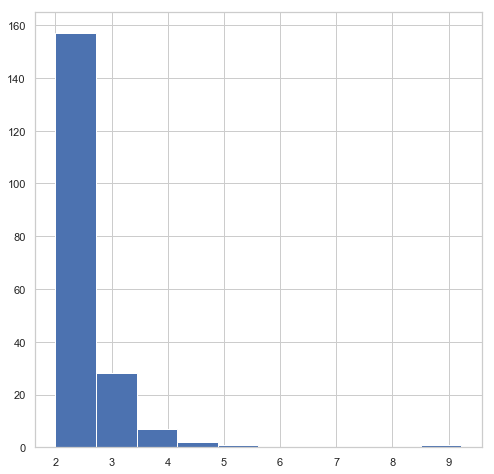

In [5]:
plt.figure(figsize = (8, 8))
plt.hist(agent_econ)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

#### Arms

+ Starting military size. This is just specified as a percent of GDP, randomly drawn from a uniform distribution between 0 and 0.06. From here on out the military size of various agents will be grown by decisions within the model.

In [6]:
agent_arms = [a.arms for a in model.schedule.agents]

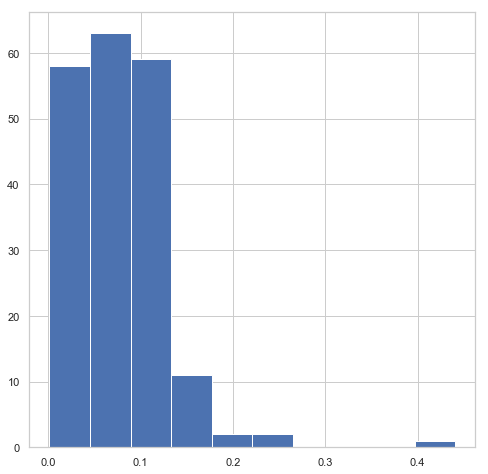

In [7]:
plt.figure(figsize = (8, 8))
plt.hist(agent_arms)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

+ Spatial distribution:

In [8]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

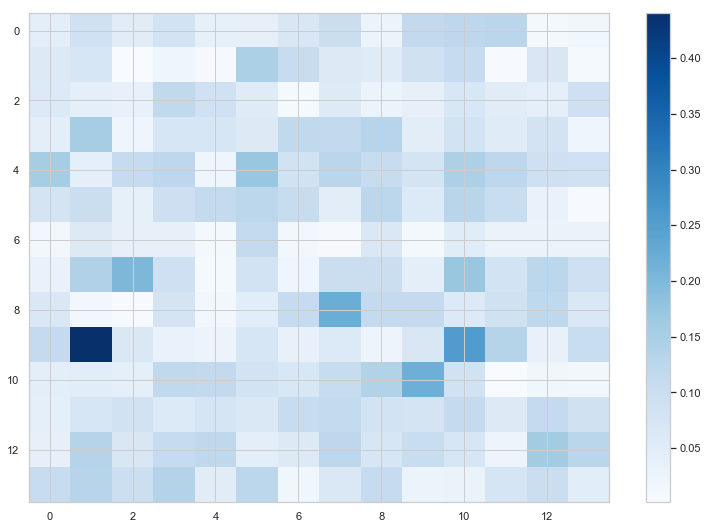

In [9]:
plt.figure(figsize = (13, 9))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
#plt.savefig('arms_start.pdf', bbox_inches='tight') ## Save image
plt.show()

### 100 Rounds

In [10]:
for i in range(100):
    model.step()

### Military spending

In [11]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

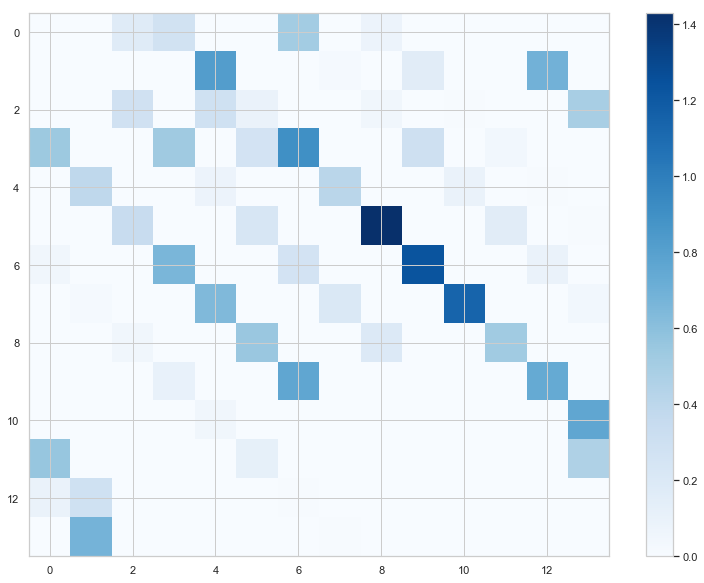

In [12]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap = 'Blues')
plt.colorbar()
# plt.savefig('grid4.png', bbox_inches='tight') ## save image
plt.show()

### Military Spending/Rents

+ What percent of a state's total possible government expenditures go to the military. This is the key variable and something that we can't quite get observationally with real data. Out of all the money that a state could extract from its population and industries, how much goes to the military? To the extent that a state is nowhere near its max spending ability for the military, then it is not engaged in an arms race.

In [13]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

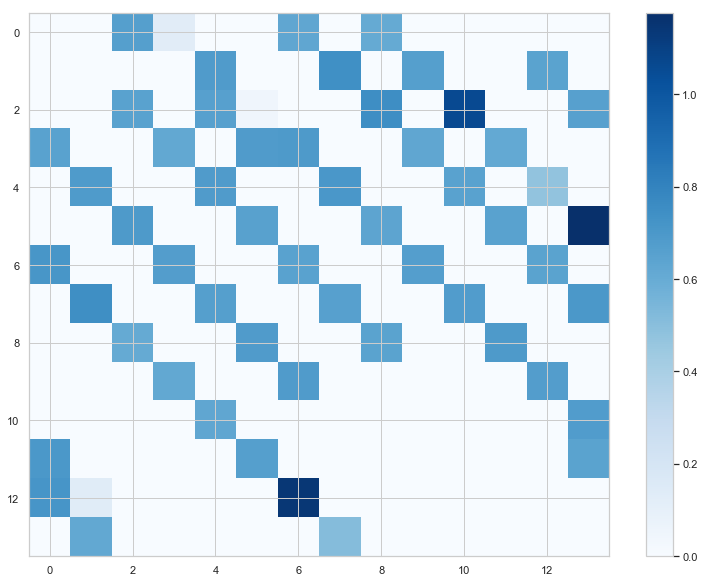

In [14]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

+ Right now there are some funky patterns, but the model has not yet reached a steady state. Let's let the model run for a while and see where it stabilizes/equilibrates.

### 1000 Rounds

In [15]:
for i in range(1000):
    model.step()

### Military spending

In [16]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

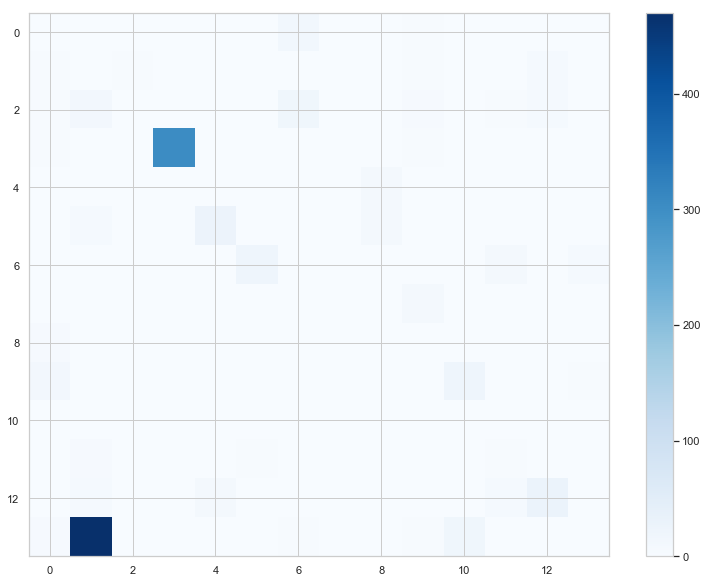

In [17]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap = 'Blues')
plt.colorbar()
# plt.savefig('grid4.png', bbox_inches='tight') ## save image
plt.show()

+ Looking at the final distribution of arms spending, we see a situation that looks similar to the current era. One dominant state is like the US and another China.

### Military spending/GDP

In [18]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

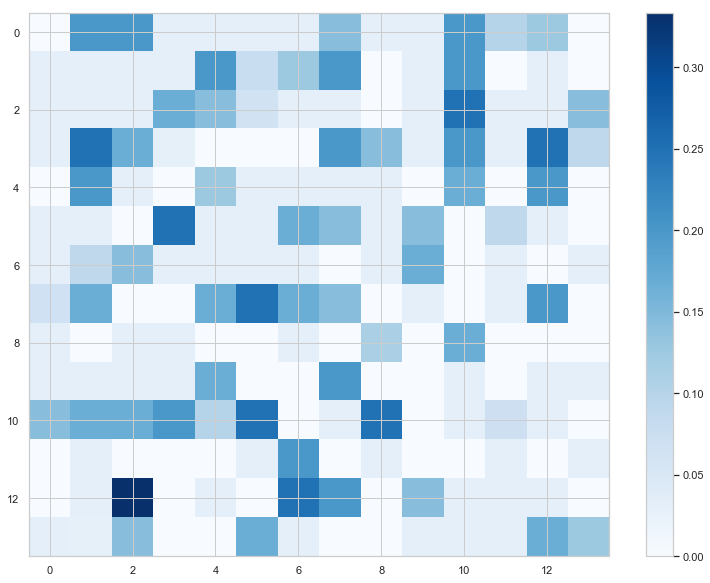

In [19]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

### Military Spending/Rents

In [20]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

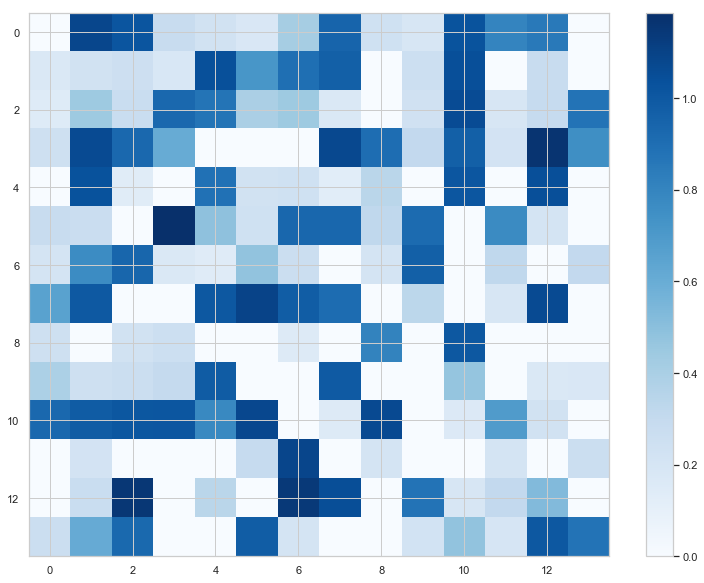

In [21]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

+ Ok, the funky patterns go away. This all looks good.

### Stable state arms/available

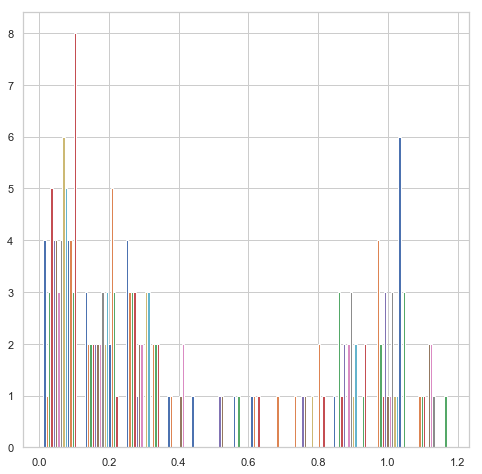

In [22]:
plt.figure(figsize = (8, 8))
plt.hist(agent_competition)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

+ Ok, so this is great -- the model's stable state of military spending/gdp looks very realistic under these starting conditions. Now, let's do a parameter sweep.
    + Why are a few cases over 1? This might be due to rounding errors? Look into...

# Parameter sweeps

+ What is my model-based parameter? -- See Mesa Schelling Jupyter notebook for example code for batchrunner

In [23]:
from mesa.batchrunner import BatchRunner

fixed_params = {
    "height": 14,
    "width": 14,
    "density": 1,
    "domestic_min": 0.04,
    "domestic_max": 0.32,
    "domestic_mean": 0.16, # Mean of gdp to extract for governance
    "domestic_sd": 0.05 # SD of gdp to extract for governance

}

variable_params = {
    "expenditures": np.arange(0, 1.0, 0.1), # No need to set to 1 or 0.8 -- no arms spending
    "num_adversaries": range(1,9) # range is funny - this is 1,2,3,...,8
}

+ Custom functions:
    + Number of agents spending less than x% of their domestic rents on arms
    + Mean % of domestic rents spent on arms
    + SD of the % of domestic rents spent on arms

In [24]:
def num_agent_20(model):
    agent_arms = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        arms = a.arms
        agent_arms[X][Y] = arms

    agent_econ = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        econ = a.econ
        agent_econ[X][Y] = econ

    agent_domestic = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        domestic = a.domestic
        agent_domestic[X][Y] = domestic

    mil_dom = agent_arms / (agent_econ * agent_domestic) 
    return ((mil_dom <= .20).sum()/(mil_dom.shape[0] * mil_dom.shape[1]))

def num_agent_40(model):
    agent_arms = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        arms = a.arms
        agent_arms[X][Y] = arms

    agent_econ = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        econ = a.econ
        agent_econ[X][Y] = econ

    agent_domestic = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        domestic = a.domestic
        agent_domestic[X][Y] = domestic

    mil_dom = agent_arms / (agent_econ * agent_domestic) 
    return ((mil_dom <= .40).sum()/(mil_dom.shape[0] * mil_dom.shape[1]))

def num_agent_60(model):
    agent_arms = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        arms = a.arms
        agent_arms[X][Y] = arms

    agent_econ = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        econ = a.econ
        agent_econ[X][Y] = econ

    agent_domestic = np.zeros((model.grid.width, model.grid.height))
    for a in model.schedule.agents:
        X = a.pos[0]
        Y = a.pos[1]
        domestic = a.domestic
        agent_domestic[X][Y] = domestic

    mil_dom = agent_arms / (agent_econ * agent_domestic) 
    return ((mil_dom <= .60).sum()/(mil_dom.shape[0] * mil_dom.shape[1]))

In [ ]:
#def num_agent_20(model):
#    agent_arms = [agent.arms for agent in model.schedule.agents]
#    agent_arms = np.array(agent_arms)
#    agent_dom = [agent.domestic * agent.econ for agent in model.schedule.agents]
#    agent_dom = np.array(agent_dom)
#    mil_dom = np.array(agent_arms/agent_dom)
#    return ((mil_dom <= .20).sum()/len(mil_dom))

#def num_agent_40(model):
#    agent_arms = [agent.arms for agent in model.schedule.agents]
#    agent_arms = np.array(agent_arms)
#    agent_dom = [agent.domestic * agent.econ for agent in model.schedule.agents]
#    agent_dom = np.array(agent_dom)
#    mil_dom = np.array(agent_arms/agent_dom)
#    return ((mil_dom <= .40).sum()/len(mil_dom))

#def num_agent_60(model):
#    agent_arms = [agent.arms for agent in model.schedule.agents]
#    agent_arms = np.array(agent_arms)
#    agent_dom = [agent.domestic * agent.econ for agent in model.schedule.agents]
#    agent_dom = np.array(agent_dom)
#    mil_dom = np.array(agent_arms/agent_dom)
#    return ((mil_dom <= .60).sum()/len(mil_dom))

In [25]:
model_reporters = {
    "Percent_Sub_20": num_agent_20,
    "Percent_Sub_40": num_agent_40,
    "Percent_Sub_60": num_agent_60
}

In [ ]:
#def mean_mil_dom(model):
#    agent_arms = [agent.arms for agent in model.schedule.agents]
#    agent_arms = np.array(agent_arms)
#    agent_dom = [agent.domestic * agent.econ for agent in model.schedule.agents]
#    agent_dom = np.array(agent_dom)
#    mil_dom = agent_arms/agent_dom
#    return (mil_dom.mean())

In [ ]:
#def sd_mil_dom(model):
#    agent_arms = [agent.arms for agent in model.schedule.agents]
#    agent_arms = np.array(agent_arms)
#    agent_dom = [agent.domestic * agent.econ for agent in model.schedule.agents]
#    agent_dom = np.array(agent_dom)
#    mil_dom = agent_arms/agent_dom
#    return (mil_dom.std())

In [ ]:
# model_reporters = {"Mean_MilDom": mean_mil_dom, "SD_MilDom": sd_mil_dom}

+ **IMPORTANT**: Iteration is the number of iterations per parameter sweep.

In [26]:
random.seed(54321)

+ Right now the batchrunner is commented out because the data can be loaded and the batch takes a long time to run.

In [ ]:
#batch_run = BatchRunner(
#    EconMod,
#    fixed_parameters = fixed_params,
#    variable_parameters = variable_params,
#                        iterations = 1, # How many times to try each variable combination?
#                        max_steps = 1000,
#                        model_reporters = model_reporters
#)

In [ ]:
# batch_run.run_all()

In [ ]:
# run_data = batch_run.get_model_vars_dataframe()
# run_data

+ Load the batchrunner's results: (comment out if you run the batch)
    + https://stackoverflow.com/questions/2960864/how-can-i-save-all-the-variables-in-the-current-python-session

In [2]:
import dill
filename = 'globalsave.pkl'
dill.load_session(filename)

+ https://stackoverflow.com/questions/46870672/multiple-lines-on-line-plot-time-series-with-matplotlib-or-plot-ly-on-python

In [28]:
sub_20 = run_data[["expenditures", "num_adversaries", "Percent_Sub_20"]]
sub_40 = run_data[["expenditures", "num_adversaries", "Percent_Sub_40"]]
sub_60 = run_data[["expenditures", "num_adversaries", "Percent_Sub_60"]]

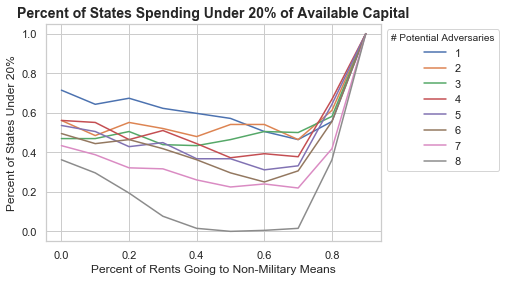

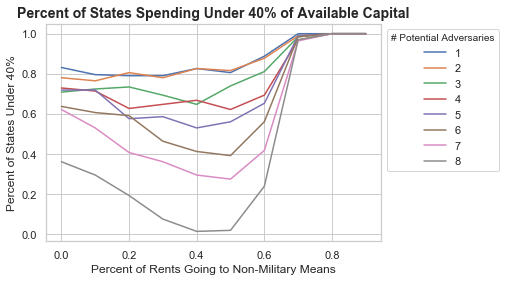

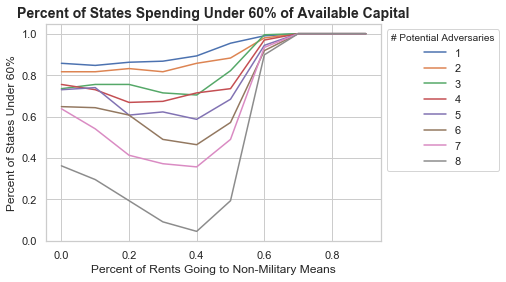

In [30]:
sub_20.pivot(index="expenditures", columns="num_adversaries", values="Percent_Sub_20").plot()
plt.title("Percent of States Spending Under 20% of Available Capital", fontsize=14, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
plt.xlabel("Percent of Rents Going to Non-Military Means")
plt.ylabel("Percent of States Under 20%")
plt.legend(bbox_to_anchor=(1, 1), title = "# Potential Adversaries")

sub_40.pivot(index="expenditures", columns="num_adversaries", values="Percent_Sub_40").plot()
plt.title("Percent of States Spending Under 40% of Available Capital", fontsize=14, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
plt.xlabel("Percent of Rents Going to Non-Military Means")
plt.ylabel("Percent of States Under 40%")
plt.legend(bbox_to_anchor=(1, 1), title = "# Potential Adversaries")

sub_60.pivot(index="expenditures", columns="num_adversaries", values="Percent_Sub_60").plot()
plt.title("Percent of States Spending Under 60% of Available Capital", fontsize=14, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
plt.xlabel("Percent of Rents Going to Non-Military Means")
plt.ylabel("Percent of States Under 60%")
plt.legend(bbox_to_anchor=(1, 1), title = "# Potential Adversaries")


In [ ]:
#import dill                     
#filename = 'globalsave.pkl'
#dill.dump_session(filename)